# Number Recognition Project

Welcome to the Pasific Labs Number Recognition project notebook. This notebook consolidates the model training and inference logic used in the application.

## Project: Bias
**Date**: 28 Nov 2025

## 1. Setup and Imports
Loading necessary libraries for the project.

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps, ImageDraw

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.20.0
Keras version: 3.12.0


## 2. Data Loading and Preprocessing
I use the MNIST dataset which contains 60,000 training images and 10,000 testing images of handwritten digits.

In [16]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Normalize data (0-255 -> 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN (batch_size, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("\nData reshaped for CNN:")
print("x_train reshaped:", x_train.shape)
print("x_test reshaped:", x_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)

Data reshaped for CNN:
x_train reshaped: (60000, 28, 28, 1)
x_test reshaped: (10000, 28, 28, 1)


### Visualize Data
Let's look at some examples from the dataset.

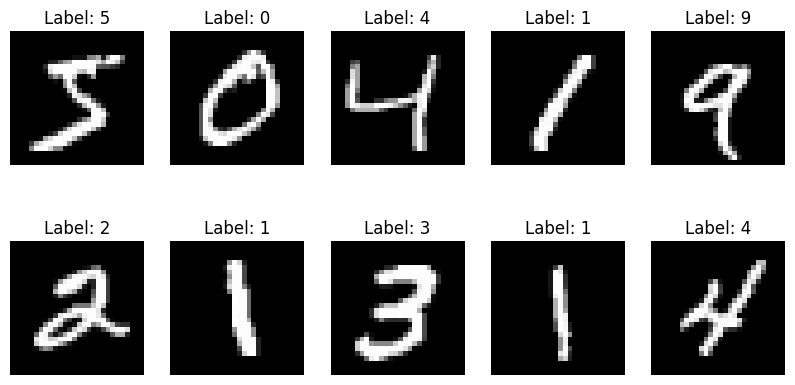

In [17]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

## 3. Model Architecture
I build a Convolutional Neural Network (CNN) to classify the digits.

In [18]:
model = models.Sequential()

# First Convolutional Block
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2,2))

# Second Convolutional Block
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

# Flatten and Dense Layers
model.add(layers.Flatten())
model.add(layers.Dropout(0.20))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Training
Train the model on the training data.

In [19]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9524 - loss: 0.1511 - val_accuracy: 0.9828 - val_loss: 0.0542
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9837 - loss: 0.0534 - val_accuracy: 0.9873 - val_loss: 0.0370
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9876 - loss: 0.0393 - val_accuracy: 0.9904 - val_loss: 0.0280
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9909 - loss: 0.0298 - val_accuracy: 0.9926 - val_loss: 0.0240
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9925 - loss: 0.0229 - val_accuracy: 0.9901 - val_loss: 0.0324


### Training History

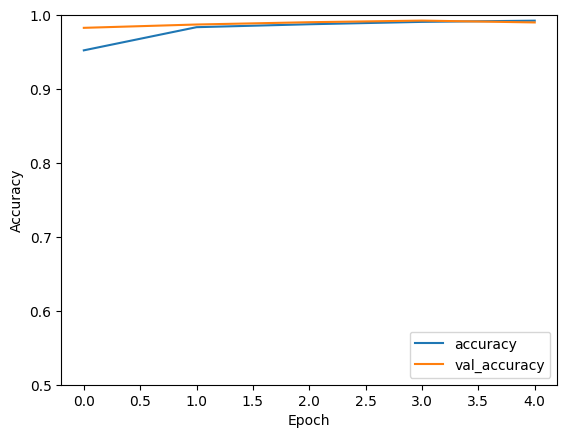

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

## 5. Saving the Model

In [21]:
model.save("model_digit_notebook.keras")
print("Model saved as model_digit_notebook.keras")

Model saved as model_digit_notebook.keras


## 6. Inference Logic (from App)
This section replicates the preprocessing logic used in the GUI application (`app.py`). This is crucial for understanding how the model handles real-world input drawn by the user.

In [22]:
def preprocess_image_logic(image_pil):
    """
    Replicates the preprocessing steps from the Tkinter app.
    Args:
        image_pil: A PIL Image object (expected to be the raw drawing).
    Returns:
        final_img: A 28x28 PIL Image ready for the model.
    """
    # 1. Invert color (White bg -> Black bg)
    # MNIST digits are white on black, but we usually draw black on white.
    # If the input is already black on white, we invert it.
    # Note: In the app, the canvas is white and we draw black, so we invert.
    # Here we assume the input might need inversion if it's a standard drawing.
    img_inverted = ImageOps.invert(image_pil)
    
    # 2. Find bounding box
    bbox = img_inverted.getbbox()
    
    if bbox is None:
        return None

    # 3. Crop to bounding box
    img_cropped = img_inverted.crop(bbox)
    
    # 4. Resize to fit in 20x20 box, maintaining aspect ratio
    target_size = 20
    width, height = img_cropped.size
    
    scale = target_size / max(width, height)
    new_width = int(width * scale)
    new_height = int(height * scale)
    
    img_resized = img_cropped.resize((new_width, new_height), Image.Resampling.LANCZOS)
    
    # 5. Paste into center of 28x28 black canvas
    final_img = Image.new("L", (28, 28), 0) # 0 is black
    
    paste_x = (28 - new_width) // 2
    paste_y = (28 - new_height) // 2
    
    final_img.paste(img_resized, (paste_x, paste_y))
    
    return final_img

### Test Inference
You can test this by creating a dummy image or loading an external one.

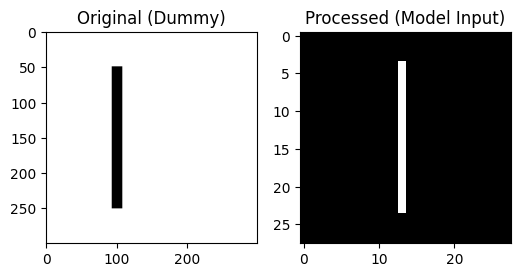

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Digit: 1
Confidence: 0.99996805


In [23]:
# Example: Create a dummy image (white background, black line)
dummy_img = Image.new("L", (300, 300), "white")
draw = ImageDraw.Draw(dummy_img)
draw.line((100, 50, 100, 250), fill="black", width=15) # Draw a '1'

# Preprocess
from PIL import ImageDraw # Re-import for the cell context if needed
processed = preprocess_image_logic(dummy_img)

if processed:
    plt.figure(figsize=(6,3))
    plt.subplot(1, 2, 1)
    plt.title("Original (Dummy)")
    plt.imshow(dummy_img, cmap='gray')
    
    plt.subplot(1, 2, 2)
    plt.title("Processed (Model Input)")
    plt.imshow(processed, cmap='gray')
    plt.show()
    
    # Predict
    img_array = np.array(processed) / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)
    prediction = model.predict(img_array)
    print("Predicted Digit:", np.argmax(prediction))
    print("Confidence:", np.max(prediction))
else:
    print("Empty image")